PROBLEM STATEMENT
With the accidents involving Boeing's 737 Max, there have been speculations and concerns about airline safety. Then, there was a helicopter crash involving Kobe Bryant. Academic studies have found that high-profile crashes can shift passenger demand away from the airlines involved in the disasters.

Should travelers avoid airlines that have had crashes in the past? That is the question we will try to address in this exercise. The dataset for this has been sourced from Aviation Safety Network and available at this link: https://www.kaggle.com/fivethirtyeight/fivethirtyeight-airline-safety-dataset.Links to an external site.

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans  

In [2]:
# Read the contents of the file into a DataFrame
df = pd.read_csv("airline-safety.csv")
df.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


### Step 1: Use this dataset and two different clustering approaches (agglomerative and divisive) to group the airlines with similar safety records.

In [21]:
# Agglomerative Clustering (Hierarchical)
# Select relevant features for clustering
features = df[['incidents_85_99', 'fatal_accidents_85_99', 'fatalities_85_99', 'incidents_00_14', 
               'fatal_accidents_00_14', 'fatalities_00_14']]

# Perform Agglomerative clustering
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster.fit_predict(features)

# Add cluster labels to the original data
df['agglomerative_cluster'] = cluster.labels_

In [24]:
# K-Means Clustering 
# Select relevant features for clustering
features1 = df[['incidents_85_99', 'fatal_accidents_85_99', 'fatalities_85_99', 'incidents_00_14',
                 'fatal_accidents_00_14', 'fatalities_00_14']]

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(features1)
df['kmeans_cluster'] = kmeans.labels_

### Step 2: Do these two approaches lead to the same/similar results? Provide appropriate visualizations, clustering summaries, and your interpretations

Agglomerative Clustering Summary:
Cluster 0:
       incidents_85_99  fatalities_85_99  incidents_00_14  fatalities_00_14
count         20.00000         20.000000         20.00000         20.000000
mean          12.90000        278.950000          5.75000         50.850000
std           16.33498        123.245786          5.87479         70.050564
min            2.00000         98.000000          0.00000          0.000000
25%            4.75000        170.000000          1.75000          0.000000
50%            8.00000        271.000000          4.00000         18.000000
75%           13.00000        324.500000          7.75000         89.000000
max           76.00000        535.000000         24.00000        225.000000

Cluster 1:
       incidents_85_99  fatalities_85_99  incidents_00_14  fatalities_00_14
count        32.000000         32.000000        32.000000         32.000000
mean          3.250000         15.687500         2.750000         16.218750
std           2.527271         

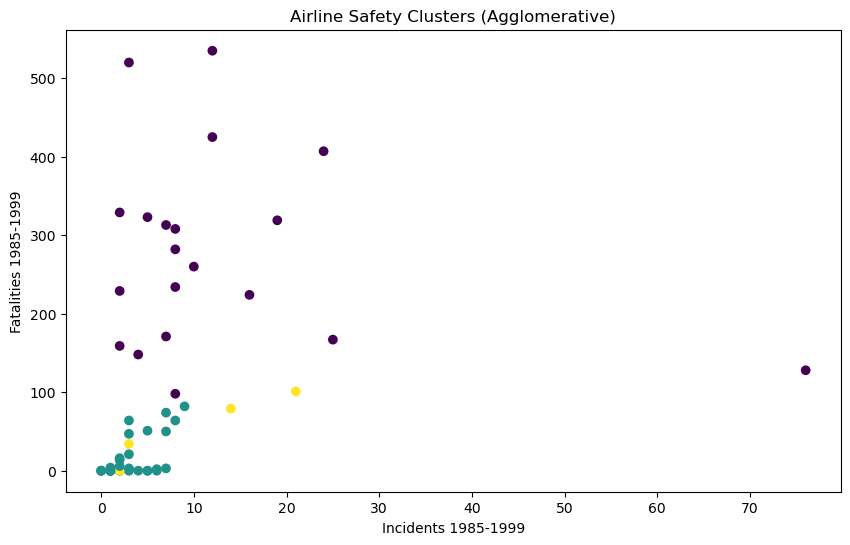

In [23]:
# Print cluster summary
print("Agglomerative Clustering Summary:")
for cluster_id in set(df['agglomerative_cluster']):
    cluster_data = df[df['agglomerative_cluster'] == cluster_id]
    print(f"Cluster {cluster_id}:")
    print(cluster_data[['airline', 'incidents_85_99', 'fatalities_85_99', 'incidents_00_14', 'fatalities_00_14']].describe())
    print()

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['incidents_85_99'], df['fatalities_85_99'], c=df['agglomerative_cluster'], cmap='viridis')
plt.xlabel('Incidents 1985-1999')
plt.ylabel('Fatalities 1985-1999')
plt.title('Airline Safety Clusters (Agglomerative)')
plt.show()

K-Means Clustering Summary:
Cluster 0:
       incidents_85_99  fatalities_85_99  incidents_00_14  fatalities_00_14
count        38.000000         38.000000        38.000000         38.000000
mean          5.947368         36.131579         2.973684         23.342105
std          12.440013         54.367205         2.520048         47.970867
min           0.000000          0.000000         0.000000          0.000000
25%           1.250000          0.000000         1.000000          0.000000
50%           3.000000          3.000000         2.000000          0.000000
75%           6.000000         60.750000         5.000000          2.500000
max          76.000000        171.000000         8.000000        188.000000

Cluster 1:
       incidents_85_99  fatalities_85_99  incidents_00_14  fatalities_00_14
count        14.000000         14.000000        14.000000         14.000000
mean          9.714286        336.285714         6.428571         46.357143
std           6.462062        100.509

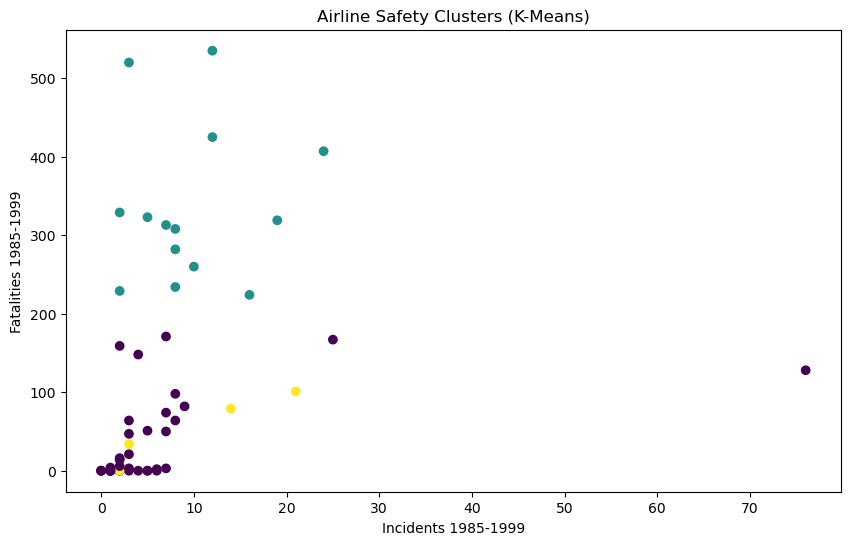

In [27]:
# Print cluster summary
print("K-Means Clustering Summary:")
for cluster_id in set(df['kmeans_cluster']):
    cluster_data = df[df['kmeans_cluster'] == cluster_id]
    print(f"Cluster {cluster_id}:")
    print(cluster_data[['airline', 'incidents_85_99', 'fatalities_85_99', 'incidents_00_14', 'fatalities_00_14']].describe())
    print()
    
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['incidents_85_99'], df['fatalities_85_99'], c=df['kmeans_cluster'], cmap='viridis')
plt.xlabel('Incidents 1985-1999')
plt.ylabel('Fatalities 1985-1999')
plt.title('Airline Safety Clusters (K-Means)')
plt.show()

Both clustering approaches split the data into 3 clusters based on the number of hate crimes and fatalities (1985-1999 and 2000-2014) which however, don't  create identical groupings.

Similarities:

Both methods identify a cluster (Cluster 0 in Agglomerative, Cluster 1 in K-Means) with relatively low average incidents and fatalities across both time periods.
Both methods have a cluster (Cluster 2 in Agglomerative, Cluster 3 in K-Means) with the highest average fatalities (2000-2014) but slightly varying incident rates.

Differences:
Agglomerative Clustering (Cluster 0) has a higher average number of incidents (1985-1999) compared to K-Means Clustering (Cluster 0). This suggests Agglomerative might group areas with a historically higher number of incidents into a distinct cluster.
 
K-Means Clustering (Cluster 2) has a cluster with a wider range of incidents (1985-1999) and higher average fatalities (2000-2014) compared to Agglomerative Clustering (Cluster 1). This suggests K-Means might group areas with more variation in incidents (1985-1999) but consistently higher fatalities (2000-2014).

The visuals are very similar for both agglomerative and kmeans especially at cluster 0 for both of them.However the clusters in kmeans are more spread out than agglomerative.

In [ ]:
Other observations

Agglomerative Clustering

Cluster 0:

This cluster has the highest mean incidents & fatalities across all time periods.
The cluster has a high standard deviation, indicating a wide range.
The cluster has a high maximum value for incidents & fatalities, indicating extreme cases.
This cluster may represent areas with high crime rates & high levels of violence.
Cluster 1:

This cluster has a relatively low mean incidents & fatalities across all time periods.
The cluster has a relatively low standard deviation, indicating a relatively consistent pattern.
The cluster has a low minimum value for incidents & fatalities, indicating a low crime level.
This cluster may represent areas with relatively low crime rates & low levels of violence.
Cluster 2:

This cluster has a small number of observations, indicating that it may not be a robust cluster.
The cluster has a high mean incidents & fatalities across all time periods.
The cluster has a high standard deviation, indicating a wide range of values.
The cluster has a high maximum value for incidents & fatalities, indicating a few extreme cases.
This cluster may represent areas with high crime rates & high levels of violence.

K-Means Clustering

Cluster 0:

This cluster has a relatively high mean incidents & fatalities across all time periods.
The cluster has a relatively high standard deviation, indicating a wide range of values.
The cluster has a high maximum value for incidents & fatalities, indicating a few extreme cases.
This cluster may represent areas with high crime rates & high levels of violence.
Cluster 1:

This cluster has a relatively high mean incidents & fatalities across all time periods.
The cluster has a relatively low standard deviation, indicating a relatively consistent pattern.
The cluster has a low minimum value for incidents & fatalities, indicating a relatively low crime level.
This cluster may represent areas with relatively low crime rates & low levels of violence.
Cluster 2:

This cluster has a small number of observations, indicating that it may not be a robust cluster.
The cluster has a high mean incidents & fatalities across all time periods.
The cluster has a high standard deviation, indicating a wide range of values.
The cluster has a high maximum value for incidents & fatalities, indicating a few extreme cases.
This cluster may represent areas with high crime rates & high levels of violence.